In [0]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import seaborn as sns
from collections import defaultdict

In [3]:
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['german.data']),names = names, delimiter=' ')

print(data.shape)
print (data.columns)
data.head(10)

Saving german.data to german.data
(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


In [0]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.classification.replace([1,2], [1,0], inplace=True)

In [0]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))

In [48]:
#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [7]:
data_clean = pd.concat([numdata_std, lenc], axis = 1)
data_clean.head(3)

,0,1,2,3,4,5,6,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,employmentsince_A75,statussex_A91,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0


In [8]:
data_clean1 = data_clean.rename(columns= { 0:'creditamount', 1: 'duration', 2:'installmentrate', 3:'residencesince', 4:'age', 
           5:'existingcredits',6: 'peopleliable'})
data_clean2 = pd.concat([data_clean1,data['classification']],axis=1)
data_clean2.head(3)


,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A61,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,employmentsince_A75,statussex_A91,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,otherdebtors_A103,property_A121,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,otherinstallmentplans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202,classification
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1


In [0]:
# Unscaled, unnormalized data
import random
random.seed(42)
X_clean = data_clean2.drop('classification', axis=1)
y_clean = data_clean2['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [0]:
final=data_clean2.drop(["existingchecking_A14","credithistory_A30","purpose_A49","savings_A61","employmentsince_A75","statussex_A91","otherdebtors_A103","property_A121","otherinstallmentplans_A143",	"housing_A151","job_A174","telephone_A191","foreignworker_A202"],axis='columns')
# Unscaled, unnormalized data
import random
random.seed(42)
X_clean1 = final.drop('classification', axis=1)
y_clean1 = final['classification']
X_train_clean1, X_test_clean1, y_train_clean1, y_test_clean1 = train_test_split(X_clean1,y_clean1,test_size=0.2, random_state=1)


In [11]:
from imblearn.over_sampling import SMOTE

# Oversampling
# Apply SMOTE
sm = SMOTE(ratio='auto')
X_train_clean_res, y_train_clean_res = sm.fit_sample(X_train_clean, y_train_clean)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [12]:
from imblearn.over_sampling import SMOTE

# Oversampling
# Apply SMOTE
sm = SMOTE(ratio='auto')
X_train_clean_res1, y_train_clean_res1 = sm.fit_sample(X_train_clean1, y_train_clean1)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean1, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res1, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_clean, y_train_clean)
y_pred_lr = classifier.predict(X_test_clean)
cm = confusion_matrix(y_test_clean, y_pred_lr)
print(cm)
print(classification_report(y_test_clean, y_pred_lr))

print("#############################################")
classifier.fit(X_train_clean1, y_train_clean1)
y_pred_lr1 = classifier.predict(X_test_clean1)
cm1 = confusion_matrix(y_test_clean1, y_pred_lr1)
print(cm1)
print(classification_report(y_test_clean1, y_pred_lr1))

print("#############################################")
classifier.fit(X_train_clean_res, y_train_clean_res)
y_pred_lr2 = classifier.predict(X_test_clean)
cm2 = confusion_matrix(y_test_clean, y_pred_lr2)
print(cm2)
print(classification_report(y_test_clean, y_pred_lr2))
print("#############################################")

classifier.fit(X_train_clean_res1, y_train_clean_res1)
y_pred_lr3 = classifier.predict(X_test_clean1)
cm3 = confusion_matrix(y_test_clean1, y_pred_lr3)
print(cm3)
print(classification_report(y_test_clean1, y_pred_lr3))

[[ 25  34]
 [ 14 127]]
              precision    recall  f1-score   support

           0       0.64      0.42      0.51        59
           1       0.79      0.90      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.75      0.76      0.74       200

#############################################
[[ 26  33]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.67      0.44      0.53        59
           1       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200

#############################################
[[ 38  21]
 [ 33 108]]
              precision    recall  f1-score   support

           0       0.54      0.64      0.58        59
           1       0.84      0.77      0.80       141

    accuracy         

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train_clean,y_train_clean)
prediction_dtree=dtree.predict(X_test_clean)
cm_dt = confusion_matrix(y_test_clean, prediction_dtree)
print(cm_dt)
print(classification_report(y_test_clean, prediction_dtree))

print("#############################################")
dtree.fit(X_train_clean1, y_train_clean1)
prediction_dtree1 = dtree.predict(X_test_clean1)
cm_dt1 = confusion_matrix(y_test_clean1, prediction_dtree1 )
print(cm_dt1)
print(classification_report(y_test_clean1, prediction_dtree1 ))

print("#############################################")
dtree.fit(X_train_clean_res, y_train_clean_res)
prediction_dtree2 = dtree.predict(X_test_clean)
cm_dt2 = confusion_matrix(y_test_clean, prediction_dtree2)
print(cm_dt2)
print(classification_report(y_test_clean, prediction_dtree2))

print("#############################################")
dtree.fit(X_train_clean_res1, y_train_clean_res1)
prediction_dtree3 = dtree.predict(X_test_clean1)
cm_dt3 = confusion_matrix(y_test_clean1, prediction_dtree3 )
print(cm_dt3)
print(classification_report(y_test_clean1, prediction_dtree3 ))

[[ 27  32]
 [ 34 107]]
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        59
           1       0.77      0.76      0.76       141

    accuracy                           0.67       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.67      0.67      0.67       200

#############################################
[[ 26  33]
 [ 35 106]]
              precision    recall  f1-score   support

           0       0.43      0.44      0.43        59
           1       0.76      0.75      0.76       141

    accuracy                           0.66       200
   macro avg       0.59      0.60      0.60       200
weighted avg       0.66      0.66      0.66       200

#############################################
[[ 26  33]
 [ 29 112]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.46        59
           1       0.77      0.79      0.78       141

    accuracy         

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_clean,y_train_clean)
prediction_rfc=rfc.predict(X_test_clean)
cm_rf = confusion_matrix(y_test_clean, prediction_rfc)
print(cm_rf)
print(classification_report(y_test_clean, prediction_rfc))

print("#############################################")
rfc.fit(X_train_clean1,y_train_clean1)
prediction_rfc1=rfc.predict(X_test_clean1)
cm_rf1 = confusion_matrix(y_test_clean1, prediction_rfc1)
print(cm_rf1)
print(classification_report(y_test_clean1, prediction_rfc1))

print("#############################################")
rfc.fit(X_train_clean_res,y_train_clean_res)
prediction_rfc2=rfc.predict(X_test_clean)
cm_rf2 = confusion_matrix(y_test_clean, prediction_rfc2)
print(cm_rf2)
print(classification_report(y_test_clean, prediction_rfc2))

print("#############################################")
rfc.fit(X_train_clean_res1,y_train_clean_res1)
prediction_rfc3=rfc.predict(X_test_clean1)
cm_rf3 = confusion_matrix(y_test_clean1, prediction_rfc3)
print(cm_rf3)
print(classification_report(y_test_clean1, prediction_rfc3))

[[ 24  35]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        59
           1       0.79      0.93      0.85       141

    accuracy                           0.78       200
   macro avg       0.75      0.67      0.68       200
weighted avg       0.76      0.78      0.75       200

#############################################
[[ 20  39]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.74      0.34      0.47        59
           1       0.77      0.95      0.85       141

    accuracy                           0.77       200
   macro avg       0.76      0.64      0.66       200
weighted avg       0.76      0.77      0.74       200

#############################################
[[ 24  35]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        59
           1       0.79      0.91      0.84       141

    accuracy         

In [0]:
from sklearn.naive_bayes import GaussianNB,  MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train_clean, y_train_clean)
predict_gnb =gnb.predict(X_test_clean)
cm_gnb= confusion_matrix(y_test_clean, predict_gnb)
print(cm_gnb)
print(classification_report(y_test_clean, predict_gnb))

print("################################################")
gnb.fit(X_train_clean1, y_train_clean1)
predict_gnb1 =gnb.predict(X_test_clean1)
cm_gnb1= confusion_matrix(y_test_clean1, predict_gnb1)
print(cm_gnb1)
print(classification_report(y_test_clean1, predict_gnb1))

print("################################################")
gnb.fit(X_train_clean_res, y_train_clean_res)
predict_gnb2 =gnb.predict(X_test_clean)
cm_gnb2= confusion_matrix(y_test_clean, predict_gnb2)
print(cm_gnb2)
print(classification_report(y_test_clean, predict_gnb2))

print("################################################")
gnb.fit(X_train_clean_res1, y_train_clean_res1)
predict_gnb3 =gnb.predict(X_test_clean1)
cm_gnb3= confusion_matrix(y_test_clean1, predict_gnb3)
print(cm_gnb3)
print(classification_report(y_test_clean1, predict_gnb3))

[[ 38  21]
 [ 39 102]]
              precision    recall  f1-score   support

           0       0.49      0.64      0.56        59
           1       0.83      0.72      0.77       141

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200

################################################
[[ 31  28]
 [ 36 105]]
              precision    recall  f1-score   support

           0       0.46      0.53      0.49        59
           1       0.79      0.74      0.77       141

    accuracy                           0.68       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.69      0.68      0.69       200

################################################
[[41 18]
 [52 89]]
              precision    recall  f1-score   support

           0       0.44      0.69      0.54        59
           1       0.83      0.63      0.72       141

    accuracy       

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_clean, y_train_clean)
predict_XGB =model.predict(X_test_clean)
cm_XGB= confusion_matrix(y_test_clean, predict_XGB)
print(cm_XGB)
print(classification_report(y_test_clean, predict_XGB))

print("################################################")
model.fit(X_train_clean1, y_train_clean1)
predict_XGB1 =model.predict(X_test_clean1)
cm_XGB1= confusion_matrix(y_test_clean1, predict_XGB1)
print(cm_XGB1)
print(classification_report(y_test_clean1, predict_XGB1))


[[ 24  35]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.62      0.41      0.49        59
           1       0.78      0.89      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200

################################################
[[ 26  33]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.54        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.68      0.69       200
weighted avg       0.76      0.78      0.76       200



In [0]:
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout

sgd = optimizers.SGD(lr=0.03, decay=0, momentum=0.9, nesterov=False)

model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=61,kernel_initializer='glorot_normal', bias_initializer='zeros'))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_clean, y_train_clean, validation_data=(X_test_clean, y_test_clean), epochs=50, batch_size=128)
[test_loss, test_acc] = model.evaluate(X_test_clean, y_test_clean)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

print("####################################################################################################################")
model.fit(X_train_clean_res, y_train_clean_res, validation_data=(X_test_clean, y_test_clean), epochs=50, batch_size=128)
[test_loss, test_acc] = model.evaluate(X_test_clean, y_test_clean)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Using TensorFlow backend.
W0630 05:43:24.090196 140395696600960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 05:43:24.093157 140395696600960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 05:43:24.096210 140395696600960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0630 05:43:24.119151 140395696600960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_def

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 0s 305us/step - loss: 0.7812 - acc: 0.5288 - val_loss: 0.6323 - val_acc: 0.7000
Epoch 2/50
800/800 [==============================] - 0s 30us/step - loss: 0.6488 - acc: 0.6938 - val_loss: 0.5789 - val_acc: 0.7150
Epoch 3/50
800/800 [==============================] - 0s 27us/step - loss: 0.5763 - acc: 0.7050 - val_loss: 0.5477 - val_acc: 0.7350
Epoch 4/50
800/800 [==============================] - 0s 22us/step - loss: 0.5434 - acc: 0.7250 - val_loss: 0.5360 - val_acc: 0.7450
Epoch 5/50
800/800 [==============================] - 0s 18us/step - loss: 0.5114 - acc: 0.7538 - val_loss: 0.5271 - val_acc: 0.7650
Epoch 6/50
800/800 [==============================] - 0s 19us/step - loss: 0.5145 - acc: 0.7437 - val_loss: 0.5236 - val_acc: 0.7750
Epoch 7/50
800/800 [==============================] - 0s 22us/step - loss: 0.5034 - acc: 0.7525 - val_loss: 0.5206 - val_acc: 0.7550
Epoch 8/50
800/800 [==

In [0]:
from sklearn.metrics import precision_recall_fscore_support as score
rf = RandomForestClassifier(n_estimators= 50, max_depth= 20, n_jobs= -1)
rf_model = rf.fit(X_train_clean,y_train_clean)
sorted(zip(rf.feature_importances_,X_train_clean.columns), reverse = True)[0:15]

[(0.09934268729925991, 'creditamount'),
 (0.08183614749566613, 'age'),
 (0.07558309569471236, 'duration'),
 (0.0432992557826157, 'existingchecking_A11'),
 (0.03977736932931203, 'installmentrate'),
 (0.0356243230115727, 'existingchecking_A14'),
 (0.031840463443462565, 'residencesince'),
 (0.0286497312092421, 'credithistory_A34'),
 (0.021184391606679225, 'existingchecking_A12'),
 (0.01974605218469066, 'savings_A61'),
 (0.018135503979555954, 'credithistory_A30'),
 (0.01802240458872968, 'otherinstallmentplans_A143'),
 (0.01763134193610312, 'existingcredits'),
 (0.01719543614833961, 'employmentsince_A73'),
 (0.017164585167830565, 'purpose_A40')]

In [0]:
data_clean3 =data_clean1.drop(["peopleliable"	,"existingchecking_A12","existingchecking_A13","credithistory_A30","credithistory_A31","credithistory_A32","credithistory_A33","purpose_A41","purpose_A410","purpose_A42","purpose_A43","purpose_A44","purpose_A45","purpose_A46","purpose_A48","purpose_A49","savings_A62","savings_A63","savings_A64","savings_A65","employmentsince_A71","employmentsince_A74","employmentsince_A75","statussex_A91","statussex_A92","statussex_A94","otherdebtors_A101","otherdebtors_A102","otherdebtors_A103","property_A122","property_A123","property_A124","otherinstallmentplans_A141","otherinstallmentplans_A142","otherinstallmentplans_A143","housing_A151","housing_A152","housing_A153","job_A171",	"job_A172",	"job_A173",	"job_A174","telephone_A191"	,"telephone_A192",	"foreignworker_A201","foreignworker_A202"], axis=1)
data_clean4 = pd.concat([data_clean3,data['classification']],axis=1)

In [0]:
# Unscaled, unnormalized data
import random
random.seed(42)
X_clean3 = data_clean4.drop('classification', axis=1)
y_clean3 = data_clean4['classification']
X_train_clean5, X_test_clean5, y_train_clean5, y_test_clean5 = train_test_split(X_clean3,y_clean3,test_size=0.2, random_state=1)

In [0]:
# Oversampling
# Apply SMOTE
sm = SMOTE(ratio='auto')
X_train_clean_res5, y_train_clean_res5 = sm.fit_sample(X_train_clean5, y_train_clean5)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean5, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res5, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_clean5, y_train_clean5)
y_pred_lr5 = classifier.predict(X_test_clean5)
cm5 = confusion_matrix(y_test_clean5, y_pred_lr5)
print(cm5)
print(classification_report(y_test_clean5, y_pred_lr5))


print("#############################################")
classifier.fit(X_train_clean_res5, y_train_clean_res5)
y_pred_lr6 = classifier.predict(X_test_clean5)
cm6 = confusion_matrix(y_test_clean5, y_pred_lr6)
print(cm6)
print(classification_report(y_test_clean5, y_pred_lr6))


[[ 26  33]
 [ 16 125]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.51        59
           1       0.79      0.89      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.76      0.74       200

#############################################
[[ 38  21]
 [ 37 104]]
              precision    recall  f1-score   support

           0       0.51      0.64      0.57        59
           1       0.83      0.74      0.78       141

    accuracy                           0.71       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.74      0.71      0.72       200



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train_clean5,y_train_clean5)
prediction_dtree5=dtree.predict(X_test_clean5)
cm_dt5 = confusion_matrix(y_test_clean5, prediction_dtree5)
print(cm_dt5)
print(classification_report(y_test_clean5, prediction_dtree5))


print("#############################################")
dtree.fit(X_train_clean_res5,y_train_clean_res5)
prediction_dtree6=dtree.predict(X_test_clean5)
cm_dt6 = confusion_matrix(y_test_clean5, prediction_dtree6)
print(cm_dt6)
print(classification_report(y_test_clean5, prediction_dtree6))

[[ 28  31]
 [ 32 109]]
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        59
           1       0.78      0.77      0.78       141

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.69      0.69      0.69       200

#############################################
[[ 24  35]
 [ 28 113]]
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        59
           1       0.76      0.80      0.78       141

    accuracy                           0.69       200
   macro avg       0.61      0.60      0.61       200
weighted avg       0.67      0.69      0.68       200



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_clean5,y_train_clean5)
prediction_rfc5=rfc.predict(X_test_clean5)
cm_rf5 = confusion_matrix(y_test_clean5, prediction_rfc5)
print(cm_rf5)
print(classification_report(y_test_clean5, prediction_rfc5))


print("#############################################################")
rfc.fit(X_train_clean_res5,y_train_clean_res5)
prediction_rfc5=rfc.predict(X_test_clean5)
cm_rf5 = confusion_matrix(y_test_clean5, prediction_rfc5)
print(cm_rf5)
print(classification_report(y_test_clean5, prediction_rfc5))

[[ 21  38]
 [ 14 127]]
              precision    recall  f1-score   support

           0       0.60      0.36      0.45        59
           1       0.77      0.90      0.83       141

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200

#############################################################
[[ 24  35]
 [ 20 121]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        59
           1       0.78      0.86      0.81       141

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200



In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_clean5, y_train_clean5)
predict_XGB5 =model.predict(X_test_clean5)
cm_XGB5= confusion_matrix(y_test_clean5, predict_XGB5)
print(cm_XGB5)
print(classification_report(y_test_clean5, predict_XGB5))



[[ 23  36]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.61      0.39      0.47        59
           1       0.78      0.89      0.83       141

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200



AUC: 0.639


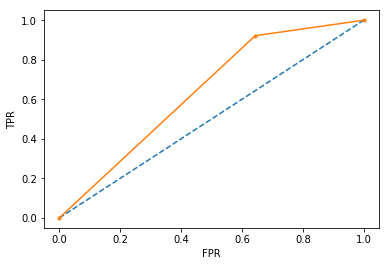

###############################################
AUC: 0.640


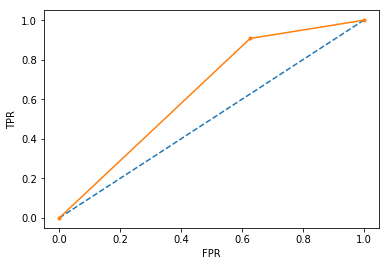

###############################################
AUC: 0.651


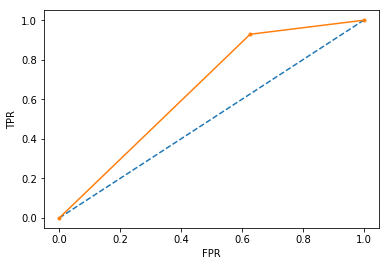

###############################################
AUC: 0.666


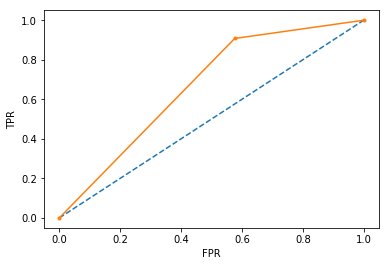

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test_clean, prediction_rfc)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_clean, prediction_rfc)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')

# show the plot
plt.show()

print("###############################################")
auc = roc_auc_score(y_test_clean1, prediction_rfc1)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_clean1, prediction_rfc1)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')

# show the plot
plt.show()

print("###############################################")
auc = roc_auc_score(y_test_clean, prediction_rfc2)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_clean, prediction_rfc2)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')

# show the plot
plt.show()

print("###############################################")      
auc = roc_auc_score(y_test_clean1, prediction_rfc3)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_clean1, prediction_rfc3)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')

# show the plot
plt.show()


In [0]:
rfc.fit(X_train_clean1,y_train_clean1)
prediction_rfc1=rfc.predict(X_test_clean1)
cm_rf1 = confusion_matrix()
print(cm_rf1)
print(classification_report(y_test_clean1, prediction_rfc1))

[[ 21  38]
 [ 12 129]]
              precision    recall  f1-score   support

           0       0.64      0.36      0.46        59
           1       0.77      0.91      0.84       141

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200



In [39]:
df=pd.DataFrame(prediction_rfc1, columns=['y_predict'])
df

,y_predict
0,1
1,0
2,1
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [40]:
X_test_clean1.reset_index(inplace=True)
X_test_clean1.drop(['index'],axis=1,inplace=True)
y_test_clean1=y_test_clean1.reset_index(drop=True)
output_1 = X_test_clean1.join(df,how='outer')
final = output_1.join(y_test_clean1,how='outer')
final.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,savings_A62,savings_A63,savings_A64,savings_A65,employmentsince_A71,employmentsince_A72,employmentsince_A73,employmentsince_A74,statussex_A92,statussex_A93,statussex_A94,otherdebtors_A101,otherdebtors_A102,property_A122,property_A123,property_A124,otherinstallmentplans_A141,otherinstallmentplans_A142,housing_A152,housing_A153,job_A171,job_A172,job_A173,telephone_A192,foreignworker_A201,y_predict,classification
0,1.268461,-0.489762,-1.764514,-0.765977,-0.135974,-0.704926,2.334869,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0
1,4.460933,1.252574,-0.870183,0.140505,0.655598,-0.704926,-0.428290,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1
2,-0.181566,-0.738668,-0.870183,1.046987,-0.135974,1.027079,-0.428290,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1


In [0]:
from google.colab import files

final.to_csv('comparison.csv')
files.download('comparison.csv')